<a href="https://colab.research.google.com/github/kulbinderdio/UKCensusDataAnalysis/blob/main/SecondPlace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:

import pandas as pd

# Load the CSV file
# Downloaded from https://commonslibrary.parliament.uk/research-briefings/cbp-10009/
file_path = '/content/HoC-GE2024-results-by-candidate.csv'
election_data = pd.read_csv(file_path)

# Group by Constituency and sort by Votes within each group
sorted_data = election_data.sort_values(by=['Constituency name', 'Votes'], ascending=[True, False])

# Extract the second place party for each Constituency
second_place = sorted_data.groupby('Constituency name').nth(1).reset_index()

# Display the results
# print(second_place[['Constituency name','Party name','Votes','Share']])

In [57]:
import geopandas as gpd

# Downloaded from https://geoportal.statistics.gov.uk/
countries_gdf = gpd.read_file("/content/map/PCON_JULY_2024_UK_BSC.shp")


In [62]:


# Join the 2 dataframes together
second_place.rename({'ONS ID': 'PCON24CD'}, axis=1, inplace=True)
combined_data = countries_gdf.merge(second_place,on='PCON24CD')

combined_data.columns
combined_data[['PCON24NM','Constituency name']]

,PCON24NM,Constituency name
0,Aldershot,Aldershot
1,Aldridge-Brownhills,Aldridge-Brownhills
2,Altrincham and Sale West,Altrincham and Sale West
3,Amber Valley,Amber Valley
4,Arundel and South Downs,Arundel and South Downs
...,...,...
645,Swansea West,Swansea West
646,Torfaen,Torfaen
647,Vale of Glamorgan,Vale of Glamorgan
648,Wrexham,Wrexham


<Axes: >

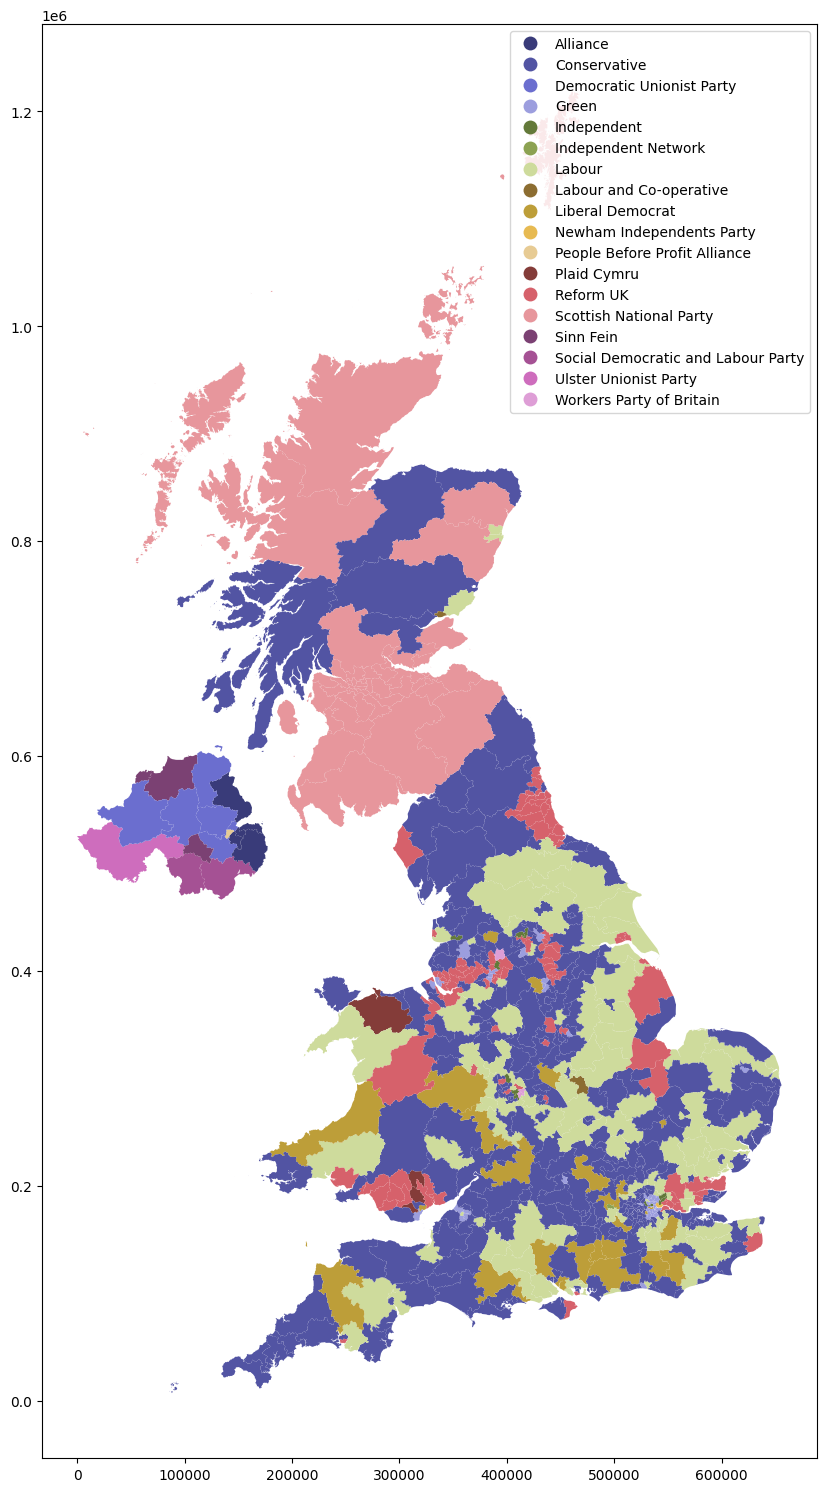

In [50]:
combined_data.plot(column="Party name", figsize=[10,20], categorical=True,cmap ='tab20b',legend = True)